In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,100000,2,2,2,26,-1,-1,-1,0,...,3542,1980,3980,4210,4159,1000,1080,2000,1525,0
1,1,100000,1,2,1,47,0,0,2,0,...,64287,67838,66135,7000,0,2500,5500,0,3000,0


In [118]:
data.rename({'default payment next month':'Class'},axis = 1, inplace = True)
data.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Class
0,0,100000,2,2,2,26,-1,-1,-1,0,...,3542,1980,3980,4210,4159,1000,1080,2000,1525,0
1,1,100000,1,2,1,47,0,0,2,0,...,64287,67838,66135,7000,0,2500,5500,0,3000,0


In [5]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.2843076630357228
Fraud Cases: 5977
Valid Transactions: 21023


c:\Users\jayga\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BILL_AMT2'>

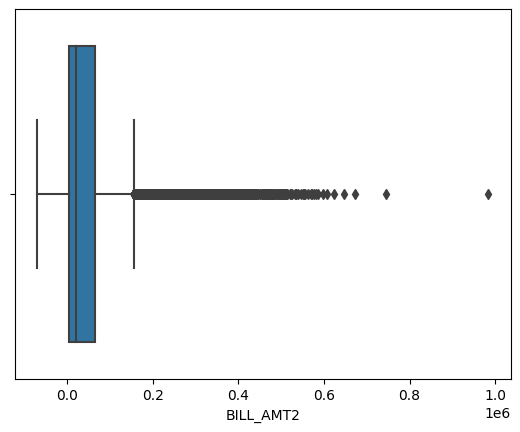

In [121]:
sns.boxplot(data['BILL_AMT2'])

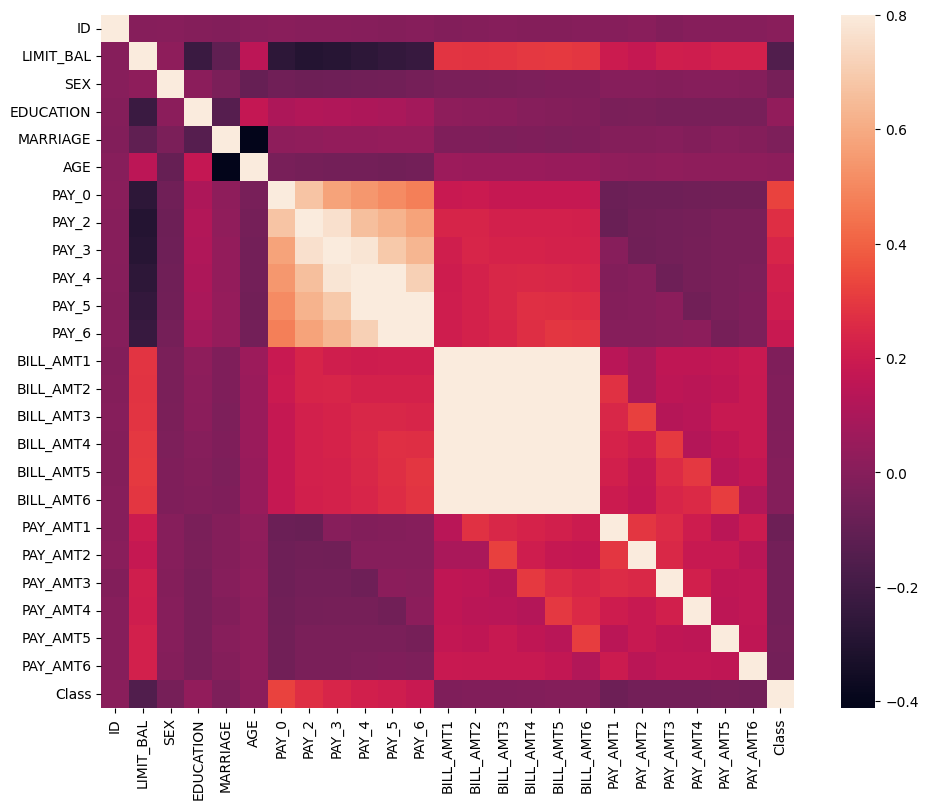

In [6]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [7]:
# dividing the X and the Y from the dataset
X = data.drop(['Class', 'ID'], axis = 1)
print(X.head(2))
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0     100000    2          2         2   26     -1     -1     -1      0   
1     100000    1          2         1   47      0      0      2      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      0  ...       4159       3542       1980       3980      4210      4159   
1      0  ...      69111      64287      67838      66135      7000         0   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0      1000      1080      2000      1525  
1      2500      5500         0      3000  

[2 rows x 23 columns]
(27000, 23)
(27000,)


In [111]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.3, random_state = 33)

In [17]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

dtree = DecisionTreeClassifier()
dtree.fit(xTrain, yTrain)
yPred_dtree = dtree.predict(xTest)

print(accuracy_score(yTest, yPred_dtree))

0.725364758698092


In [113]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=100000)
lr.fit(xTrain, yTrain)
yPred_lr = lr.predict(xTest)

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred_lr != yTest).sum()
print("The model used is Random Forest classifier")
  
acc = accuracy_score(yTest, yPred_lr)
print("The accuracy is {}".format(acc))
  
prec = precision_score(yTest, yPred_lr)
print("The precision is {}".format(prec))
  
rec = recall_score(yTest, yPred_lr)
print("The recall is {}".format(rec))
  
f1 = f1_score(yTest, yPred_lr)
print("The F1-Score is {}".format(f1))

The model used is Random Forest classifier
The accuracy is 0.7819753086419753
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0


c:\Users\jayga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(xTrain, yTrain)

pred_lgbm = lgbm.predict(xTest)

print(accuracy_score(yTest, pred_lgbm))

0.8228395061728395


In [114]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc2 = RandomForestClassifier(max_depth=43,min_samples_split=20, max_leaf_nodes=25, min_samples_leaf=12)
rfc2.fit(xTrain, yTrain)
# predictions
yPred_rfc2 = rfc2.predict(xTest)

In [115]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred_rfc2 != yTest).sum()
print("The model used is Random Forest classifier")
  
acc = accuracy_score(yTest, yPred_rfc2)
print("The accuracy is {}".format(acc))

The model used is Random Forest classifier
The accuracy is 0.8209876543209876


In [47]:
test = pd.read_csv('test.csv')
test.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,27000,30000,1,2,2,25,0,0,0,0,...,11581,12580,13716,14828,1500,2000,1500,1500,1500,2000
1,27001,150000,2,1,2,26,0,0,0,0,...,116684,101581,77741,77264,4486,4235,3161,2647,2669,2669


In [51]:
test.drop(['ID'], axis = 1, inplace= True)
test.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,30000,1,2,2,25,0,0,0,0,0,...,11581,12580,13716,14828,1500,2000,1500,1500,1500,2000
1,150000,2,1,2,26,0,0,0,0,0,...,116684,101581,77741,77264,4486,4235,3161,2647,2669,2669


In [174]:
y_pred = rfc2.predict(test.values)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
import csv

with open('submission.csv', mode='w') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    employee_writer.writerow(['ID', 'default payment next month'])
    for i in range(27000, 30000):
        employee_writer.writerow([i, y_pred[i - 27000]])

df_sub = pd.read_csv('submission.csv')
df_sub.to_csv('submission.csv', index=False)